In [ ]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install matplotlib



In [22]:
import pandas as pd

df_air = pd.read_sql_table('air', 'sqlite:///data.sqlite')

df_bikes = pd.read_sql_table('bikes', 'sqlite:///data.sqlite')

## Bike analysis

### Data after 2015
The data before 2016 seems to be different. The numbers of bikes are in the early records from 2013-2015 higher than 2016 and later.

In [70]:
# Filter the dataframe to exclude rows with years older than 2015
filtered_df = df_bikes[df_bikes['year'] >= 2016]

# Calculate the sum of columns for each year
df_sum_by_year = filtered_df.groupby('year')[df_bikes.columns.difference(['sum', 'month', 'year'])].sum()



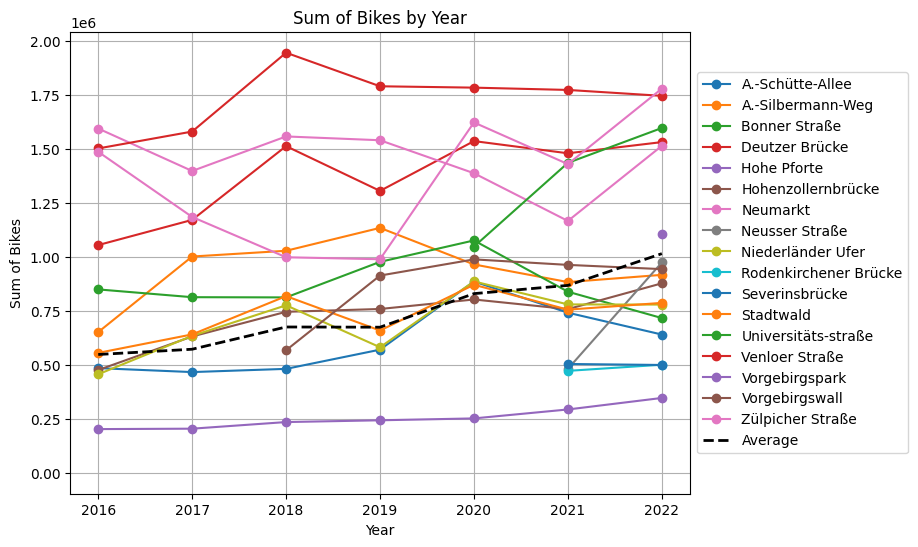

In [69]:
import matplotlib.pyplot as plt

# Calculate the average across the curves for each year
average_line = df_sum_by_year.mean(axis=1)

# Plot the sum for each year as line graphs
plt.figure(figsize=(8, 6))

# Plot the individual curves
for column in df_sum_by_year.columns:
    y_values = df_sum_by_year[column]
    x_values = df_sum_by_year.index
    non_zero_mask = y_values != 0
    zero_mask = ~non_zero_mask
    plt.plot(x_values[non_zero_mask], y_values[non_zero_mask], marker='o', label=column)
    plt.plot(x_values[zero_mask], y_values[zero_mask], marker='o', color='none')


# Plot the average line
plt.plot(df_sum_by_year.index, average_line, color='black', linestyle='--', linewidth=2, label='Average')

plt.xlabel('Year')
plt.ylabel('Sum of Bikes')
plt.title('Sum of Bikes by Year')
plt.grid(True)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We see a trend overall that the numbers of bikers increases over time. The black dotted line is the overall average of all streets.

## Air data analysis

In [60]:
df_air["Annual mean value in µg/m³"].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0     54.0
1     53.0
2     61.0
3     48.0
4     43.0
      ... 
87    27.0
88    33.0
89    34.0
90    29.0
91    28.0
Name: Annual mean value in µg/m³, Length: 92, dtype: object>

## Combined analysis

### Join streetnames in bikes  and air

In [71]:
column_names = df_bikes.columns

# Create an empty DataFrame to store the matching data
matching_data = pd.DataFrame()

# Check if the column names exist in the rows of table2
for column_name in column_names:
    search_string = "Köln " + column_name  # Add the prefix to the column name
    matching_rows = df_air[df_air.apply(lambda row: search_string in row.values, axis=1)]
    if not matching_rows.empty:
        matching_data = matching_data.append(matching_rows)


matching_data.head(10)

/tmp/ipykernel_3689/3566073516.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_data = matching_data.append(matching_rows)


,State / Measuring network,Station code,Station name,Station setting,Station type,Annual mean value in µg/m³,Number of hourly mean values above 200 µg/m³*,year,Zahl der Stundenmittelwerte über 200 µg/m³
1,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,53.0,-,2013,None
9,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,56.0,-,2014,None
16,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,51,-,2015,None
25,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,51.0,-,2016,None
34,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,47.0,-,2017,None
51,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,40.0,-,2019,None
60,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,32.0,-,2020,None
69,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,33.0,-,2021,-
80,North Rhine-Westphalia,DENW151,Köln Neumarkt,urban area,traffic,33.0,None,2022,-


The only data wich matches is "Neumarkt". So the plan will be, that the rest will be averaged. 